# **🔍 Comparison of Model Accuracies on Balanced dataset with GAN**  

---

### 📊 **Overview:**  
This notebook evaluates the performance of various machine learning models on an balanced credit card fraud detection dataset.
Most of the fraud data that is balanced is generated via GAN model.  
The analysis highlights how GAN balanced dataset affects model accuracies.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [7]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/balanced_creditcard_train.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,168169.000000,1.820497,-0.139543,-3.303744,0.446583,2.906071,3.230063,-0.001255,0.720353,0.054725,...,-0.130024,-0.541657,0.104402,0.563686,0.157068,-0.722923,0.013949,-0.013776,99.450000,0
1,70832.000000,0.998959,-0.055653,0.105777,1.060360,-0.063764,-0.026573,0.126505,0.171345,-0.136917,...,-0.384585,-1.453459,0.149302,-0.443295,0.093816,-0.806560,-0.005841,0.023605,92.390000,0
2,26926.292346,-0.793524,4.715623,-5.464822,4.770012,1.344613,-2.093739,-3.052905,-5.695046,-1.278616,...,4.154988,-1.933314,-0.354488,-0.012358,0.878830,0.811022,0.731823,0.894680,29.245847,1
3,99966.283204,-4.316216,6.947579,-9.540802,3.754857,-2.117882,0.595513,-9.805726,-15.113297,0.022044,...,7.537662,-2.876900,1.130779,-0.118708,-0.423749,0.320327,-1.021448,1.003322,21.767457,1
4,65204.000000,1.047685,0.455670,0.393644,2.550082,-0.048212,-0.498625,0.384561,-0.033035,-0.820696,...,-0.322227,-1.168894,0.208402,0.307196,0.142865,-0.336949,-0.031532,0.026837,52.900000,0


In [9]:
df.shape

(398040, 31)

In [10]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,...,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000
mean,86031.732051,-2.595227,1.615748,-3.085708,2.249706,-1.165282,-0.839274,-3.137375,-0.781856,-1.190854,...,0.364476,-0.170096,-0.549261,-0.000970,-0.062883,0.243407,-0.217762,0.157963,118.162663,0.500000
std,45994.986717,5.459776,3.538883,5.731832,2.999001,4.187059,1.802921,6.026341,8.039296,2.273647,...,2.769627,1.248544,1.500223,0.534388,0.609802,0.493369,1.043392,0.462279,255.652504,0.500001
min,-42239.584301,-56.407510,-72.715728,-47.163789,-5.683171,-42.147898,-26.160506,-82.899062,-94.986129,-21.333204,...,-35.918348,-10.933144,-44.807735,-2.824849,-10.295397,-2.534330,-22.565679,-11.710896,-635.986373,0.000000
25%,46672.000000,-3.068166,-0.417570,-4.429953,-0.039512,-1.469382,-1.785769,-4.301805,-0.493047,-1.770975,...,-0.468234,-0.691713,-1.085595,-0.307582,-0.388382,-0.110968,-0.372845,-0.036371,7.680000,0.000000
50%,77866.000000,-0.913028,0.749159,-1.058072,1.745205,-0.169487,-0.714065,-0.818958,0.086383,-0.602682,...,-0.024951,0.007519,-0.159466,0.053637,-0.004647,0.241455,-0.018979,0.083296,45.000000,0.500000
75%,128207.000000,0.401859,3.273419,0.405974,4.007304,0.902953,0.095473,0.160628,1.845972,0.114993,...,0.522958,0.575261,0.119210,0.379715,0.325837,0.598163,0.190520,0.402126,126.450007,1.000000
max,172788.000000,2.454930,22.057729,9.382558,16.715537,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,8.361985,22.528412,4.022866,7.519589,3.463246,11.135740,33.847808,19656.530000,1.000000


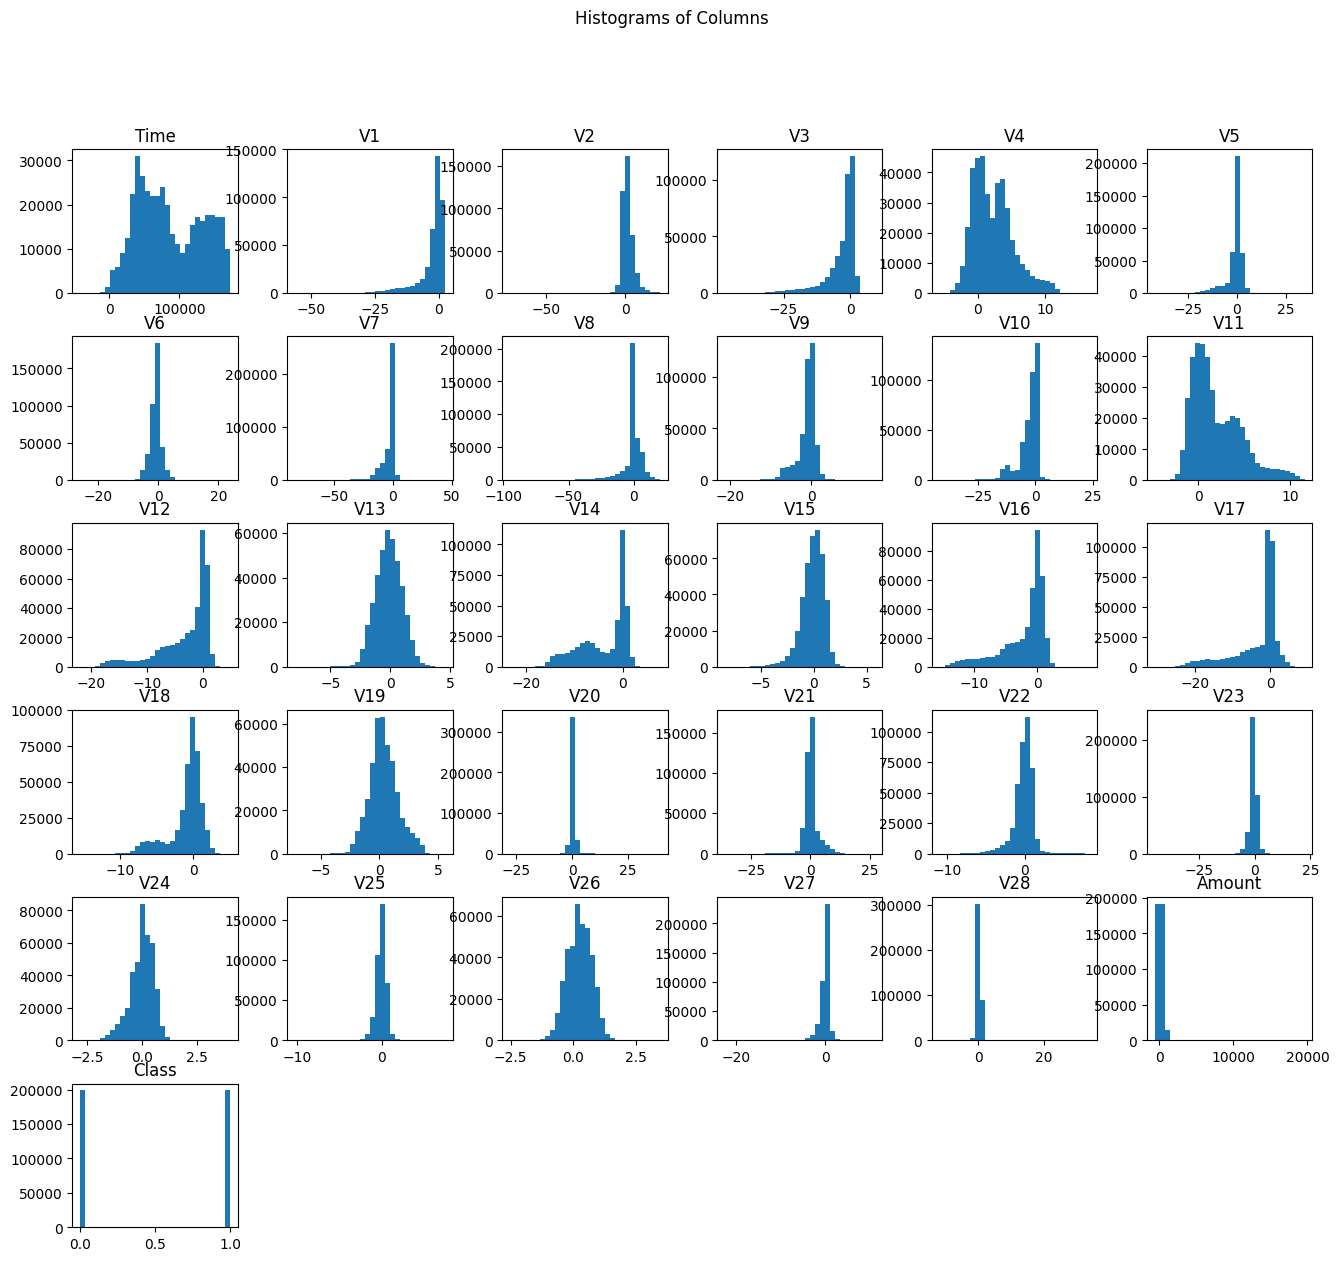

In [12]:
df.hist(bins=30,figsize=(16,14), grid=False )
plt.suptitle('Histograms of Columns')
plt.show()




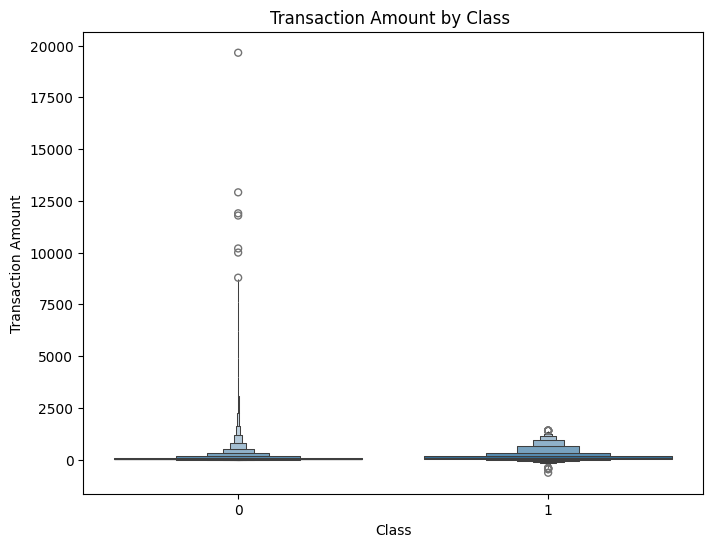

In [13]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

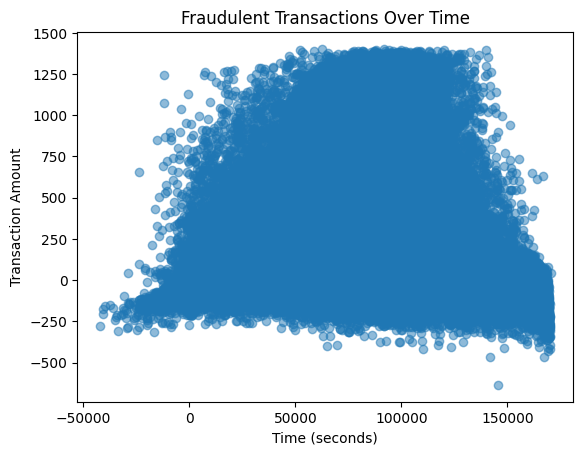

In [14]:
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

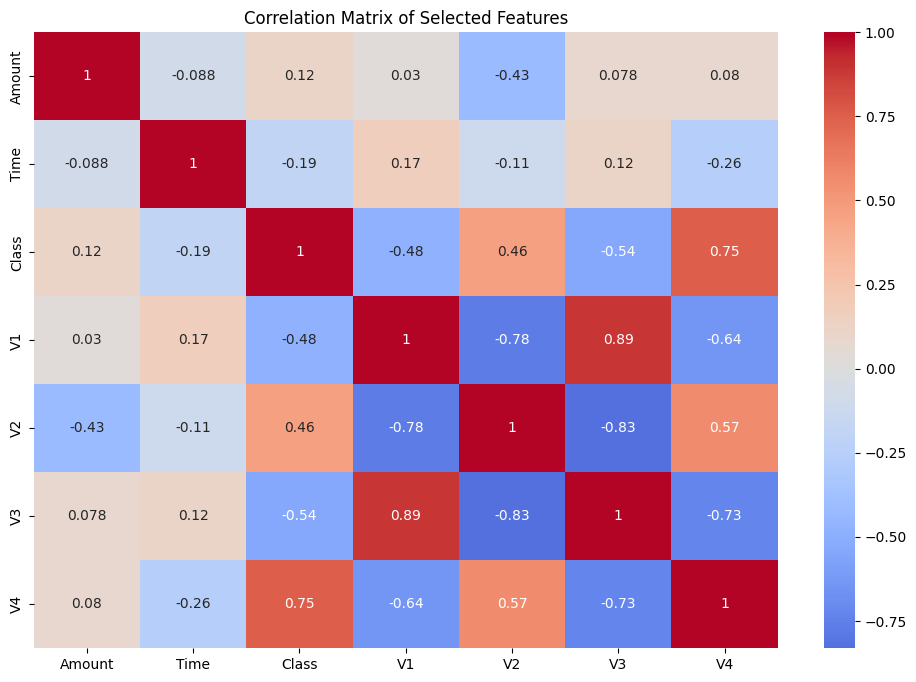

In [15]:
# Correlation matrix for important features
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Amount', 'Time', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398040 entries, 0 to 398039
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    398040 non-null  float64
 1   V1      398040 non-null  float64
 2   V2      398040 non-null  float64
 3   V3      398040 non-null  float64
 4   V4      398040 non-null  float64
 5   V5      398040 non-null  float64
 6   V6      398040 non-null  float64
 7   V7      398040 non-null  float64
 8   V8      398040 non-null  float64
 9   V9      398040 non-null  float64
 10  V10     398040 non-null  float64
 11  V11     398040 non-null  float64
 12  V12     398040 non-null  float64
 13  V13     398040 non-null  float64
 14  V14     398040 non-null  float64
 15  V15     398040 non-null  float64
 16  V16     398040 non-null  float64
 17  V17     398040 non-null  float64
 18  V18     398040 non-null  float64
 19  V19     398040 non-null  float64
 20  V20     398040 non-null  float64
 21  V21     39

In [17]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print('Fraudulent Transactions:', len(fraud))
print('Legitimate Transactions:', len(legit))

Fraudulent Transactions: 199020
Legitimate Transactions: 199020


In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- 1. PREP TRAIN DATA ---
# Combine fraud + legit for full training
train_data = pd.concat([fraud, legit], axis=0)
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print('Training Data Shape:', train_data.shape)

# Convert to numpy and split X/y
train_arr = train_data.values
x_train = train_arr[:, 1:30]
y_train = train_arr[:, 30]

# Fit scaler on training features, then transform train
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

print('X_train Shape:', x_train.shape)
print('Y_train Shape:', y_train.shape)


# --- 2. LOAD & PREP TEST DATA ---
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/creditcard_test.csv')

# Split test set into legit vs. fraud (keep .values for consistency)
fraud_test = test_df[test_df.iloc[:, 30] == 1].values
legit_test = test_df[test_df.iloc[:, 30] == 0].values

# Extract features & labels
x_fraud_test = fraud_test[:, 1:30]
y_fraud_test = fraud_test[:, 30]

x_legit_test = legit_test[:, 1:30]
y_legit_test = legit_test[:, 30]

# Scale using the same scaler
x_fraud_test = scaler.transform(x_fraud_test)
x_legit_test = scaler.transform(x_legit_test)

print('X_fraud_test Shape:', x_fraud_test.shape)
print('Y_fraud_test Shape:', y_fraud_test.shape)
print('X_legit_test Shape:', x_legit_test.shape)
print('Y_legit_test Shape:', y_legit_test.shape)


Training Data Shape: (398040, 31)
X_train Shape: (398040, 29)
Y_train Shape: (398040,)
X_fraud_test Shape: (148, 29)
Y_fraud_test Shape: (148,)
X_legit_test Shape: (85295, 29)
Y_legit_test Shape: (85295,)


In [19]:

dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)


dt_model.fit(x_train, y_train)

accuracy_legit_dt = dt_model.score(x_legit_test, y_legit_test)
accuracy_fraud_dt = dt_model.score(x_fraud_test, y_fraud_test)

print("DecisionTreeClassifier Accuracy_legit: {0:.5f}".format(accuracy_legit_dt))
print("DecisionTreeClassifier Accuracy_fraud: {0:.5f}".format(accuracy_fraud_dt))

DecisionTreeClassifier Accuracy_legit: 0.99819
DecisionTreeClassifier Accuracy_fraud: 0.80405


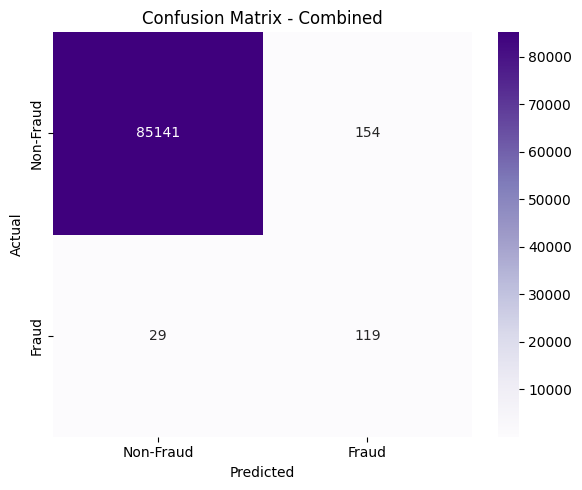

In [20]:
from sklearn.metrics import confusion_matrix
# Combine test data and labels
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict using the model
y_pred_combined = dt_model.predict(x_combined_test)

# Compute combined confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Purples", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(x_train, y_train)

accuracy_legit_rf = rf_model.score(x_legit_test, y_legit_test)
accuracy_fraud_rf = rf_model.score(x_fraud_test, y_fraud_test)

print("RandomForestClassifier Accuracy_legit: {0:.5f}".format(accuracy_legit_rf))
print("RandomForestClassifier Accuracy_fraud: {0:.5f}".format(accuracy_fraud_rf))

RandomForestClassifier Accuracy_legit: 0.99985
RandomForestClassifier Accuracy_fraud: 0.82432


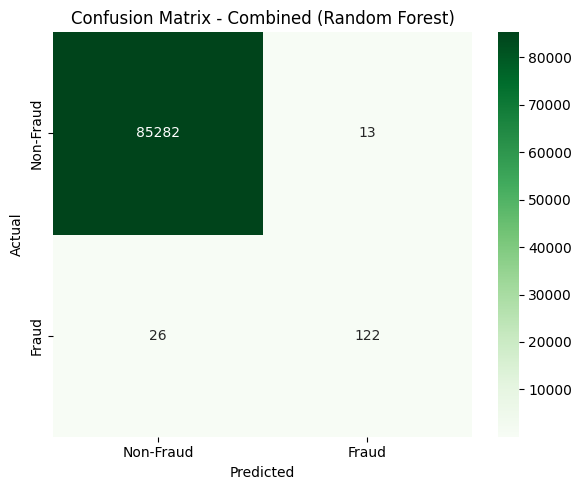

In [22]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = rf_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [23]:
svm_model = SVC(C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

accuracy_legit_svm = svm_model.score(x_legit_test, y_legit_test)
accuracy_fraud_svm = svm_model.score(x_fraud_test, y_fraud_test)

print("svm Accuracy_legit: {0:.5f}".format(accuracy_legit_svm))
print("svm Accuracy_fraud: {0:.5f}".format(accuracy_fraud_svm))

svm Accuracy_legit: 0.99980
svm Accuracy_fraud: 0.77703


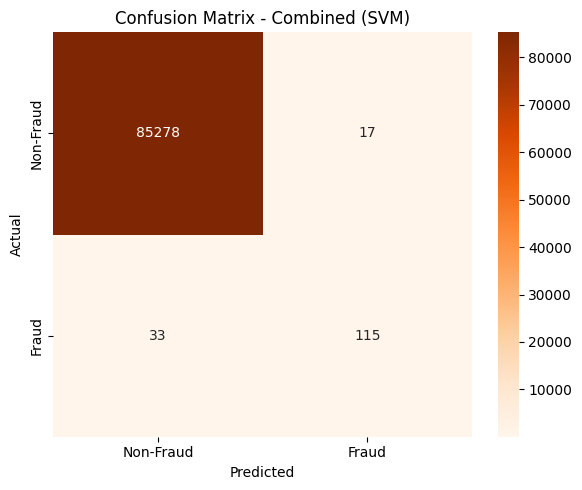

In [24]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = svm_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [25]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(x_train, y_train)

accuracy_legit_lr = svm_model.score(x_legit_test, y_legit_test)
accuracy_fraud_lr = svm_model.score(x_fraud_test, y_fraud_test)

print("Regression Accuracy_legit: {0:.5f}".format(accuracy_legit_lr))
print("Regression Accuracy_fraud: {0:.5f}".format(accuracy_fraud_lr))


Regression Accuracy_legit: 0.99980
Regression Accuracy_fraud: 0.77703


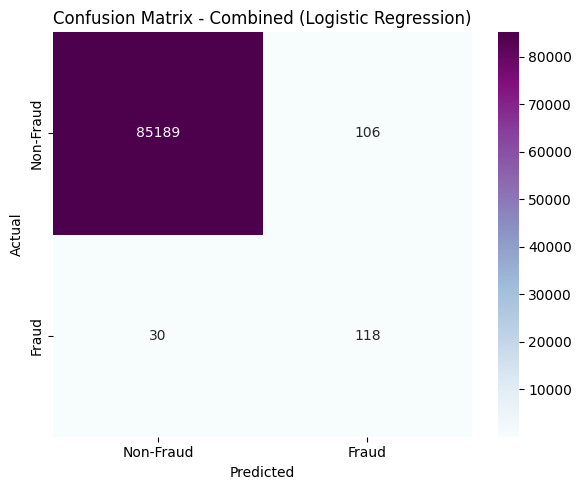

In [26]:

# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = logreg_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="BuPu", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_ab = adaboost_model.score(x_legit_test, y_legit_test)
accuracy_fraud_ab = adaboost_model.score(x_fraud_test, y_fraud_test)

print("AdaBoost Accuracy_legit: {0:.5f}".format(accuracy_legit_ab))
print("AdaBoost Accuracy_fraud: {0:.5f}".format(accuracy_fraud_ab))

AdaBoost Accuracy_legit: 0.99796
AdaBoost Accuracy_fraud: 0.83784


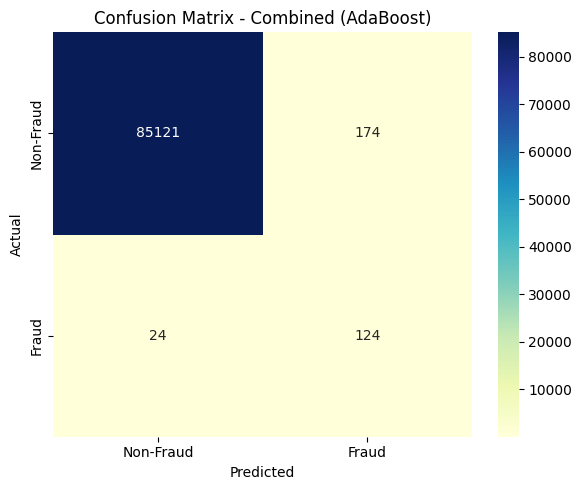

In [28]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = adaboost_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (AdaBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_gnb = gnb_model.score(x_legit_test, y_legit_test)
accuracy_fraud_gnb = gnb_model.score(x_fraud_test, y_fraud_test)

print("GaussianNB Accuracy_legit: {0:.5f}".format(accuracy_legit_gnb))
print("GaussianNB Accuracy_fraud: {0:.5f}".format(accuracy_fraud_gnb))

GaussianNB Accuracy_legit: 0.97607
GaussianNB Accuracy_fraud: 0.85811


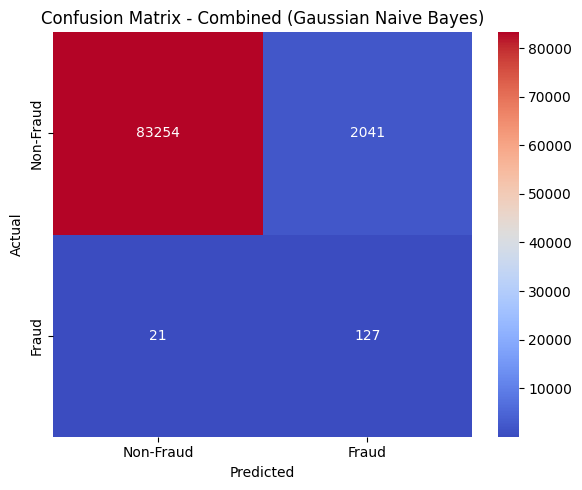

In [30]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = gnb_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (Gaussian Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of k (n_neighbors) as needed

# Train the model
knn_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_knn = knn_model.score(x_legit_test, y_legit_test)
accuracy_fraud_knn = knn_model.score(x_fraud_test, y_fraud_test)

print("KNeighbors Accuracy_legit: {0:.5f}".format(accuracy_legit_knn))
print("KNeighbors Accuracy_fraud: {0:.5f}".format(accuracy_fraud_knn))

KNeighbors Accuracy_legit: 0.99980
KNeighbors Accuracy_fraud: 0.70270


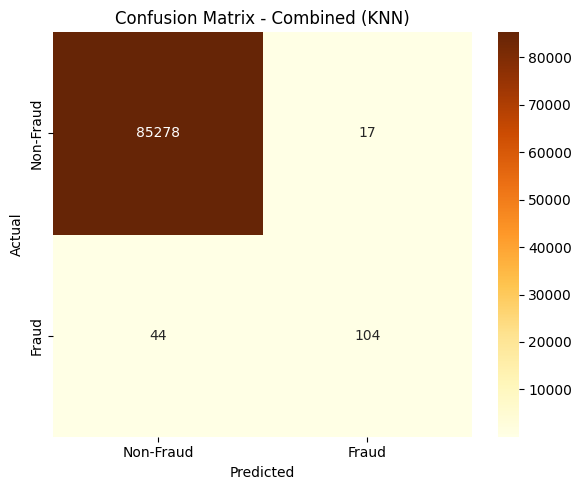

In [32]:

# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = knn_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="YlOrBr", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

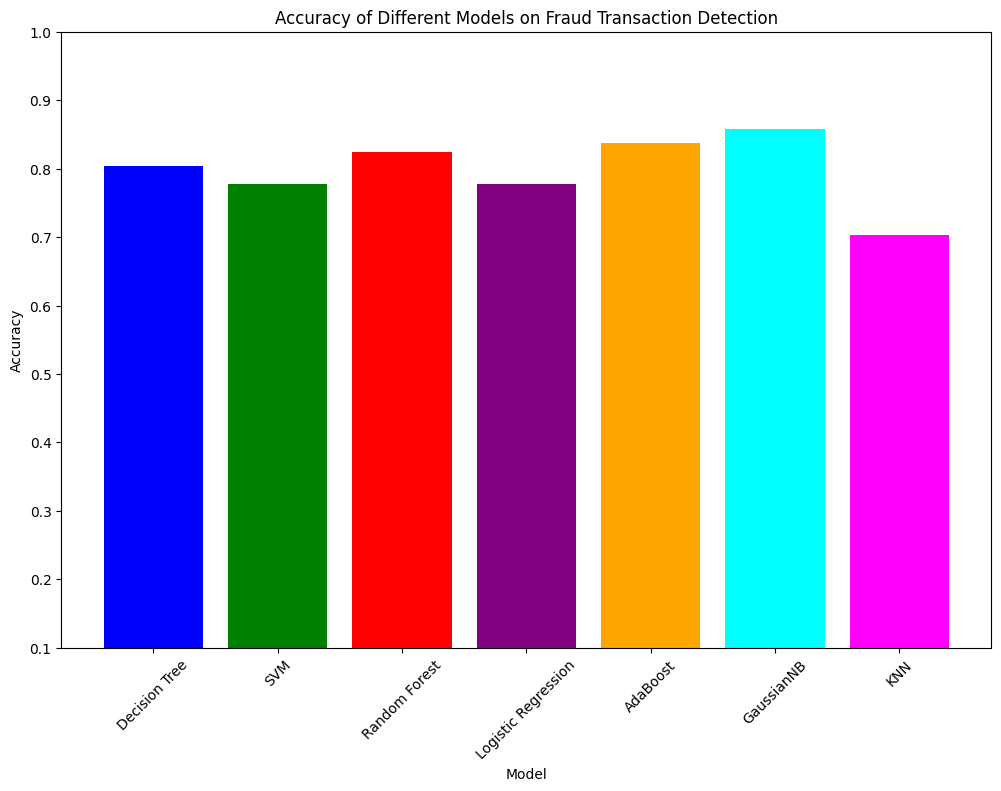

In [33]:
# Model names and accuracies
model_names = [
    'Decision Tree',
    'SVM',
    'Random Forest',
    'Logistic Regression',
    'AdaBoost',
    'GaussianNB',
    'KNN',
]

accuracies = [
    accuracy_fraud_dt,
    accuracy_fraud_svm,
    accuracy_fraud_rf,
    accuracy_fraud_lr,
    accuracy_fraud_ab,
    accuracy_fraud_gnb,
    accuracy_fraud_knn,
]

# Plotting the accuracies
plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'teal'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Fraud Transaction Detection')
plt.ylim(0.1, 1.0)  # Adjust the y-axis range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


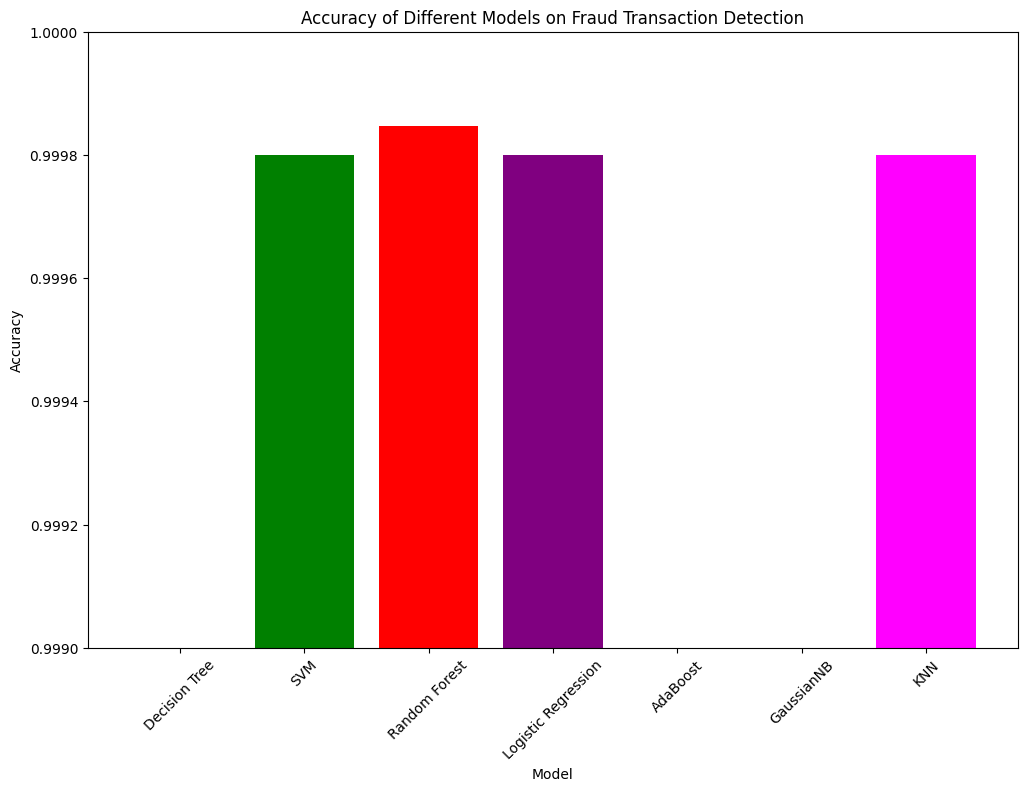

In [34]:
# Model names and accuracies
model_names = [
    'Decision Tree',
    'SVM',
    'Random Forest',
    'Logistic Regression',
    'AdaBoost',
    'GaussianNB',
    'KNN',
]

accuracies = [
    accuracy_legit_dt,
    accuracy_legit_svm,
    accuracy_legit_rf,
    accuracy_legit_lr,
    accuracy_legit_ab,
    accuracy_legit_gnb,
    accuracy_legit_knn,
]

# Plotting the accuracies
plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'teal'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Fraud Transaction Detection')
plt.ylim(0.999, 1.0)  # Adjust the y-axis range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


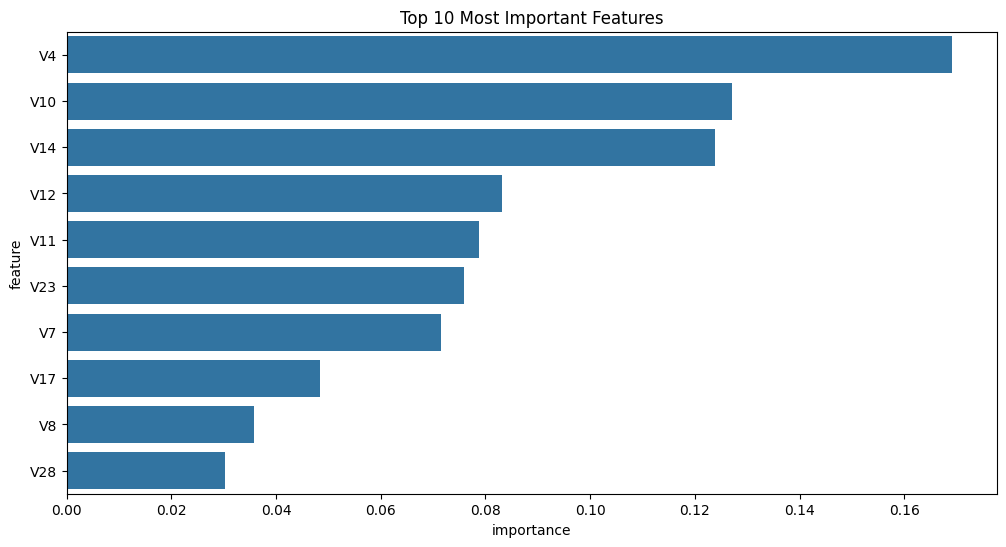

In [35]:
feature_importance = pd.DataFrame({
    'feature': df.columns[1:30],  # Exclude 'Time' and 'Class' columns
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [36]:
%pip install xgboost